In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
df=pd.read_csv(r"C:\Users\kishk\Documents\projects\healthcare_dataset.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                10000 non-null  object 
 1   Age                 10000 non-null  int64  
 2   Gender              10000 non-null  object 
 3   Blood Type          10000 non-null  object 
 4   Medical Condition   10000 non-null  object 
 5   Date of Admission   10000 non-null  object 
 6   Doctor              10000 non-null  object 
 7   Hospital            10000 non-null  object 
 8   Insurance Provider  10000 non-null  object 
 9   Billing Amount      10000 non-null  float64
 10  Room Number         10000 non-null  int64  
 11  Admission Type      10000 non-null  object 
 12  Discharge Date      10000 non-null  object 
 13  Medication          10000 non-null  object 
 14  Test Results        10000 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 1.1+

In [4]:
df.isna().sum()

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

In [5]:
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Tiffany Ramirez,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146,Elective,2022-12-01,Aspirin,Inconclusive
1,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,Lipitor,Normal
2,Chad Byrd,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.896997,292,Emergency,2019-02-08,Lipitor,Normal
3,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480,Urgent,2020-05-03,Penicillin,Abnormal
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477,Urgent,2021-08-02,Paracetamol,Normal


## Hospital count

In [6]:
hospital_counts=df['Hospital'].value_counts()


In [7]:
df['Hospital'].nunique()

8639

## Gender demographic ratio of patient with blood group

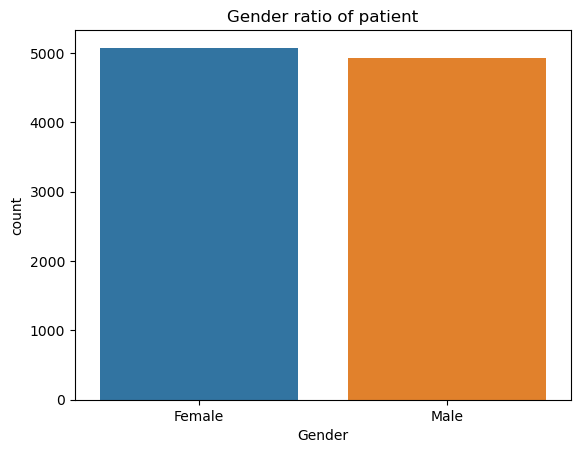

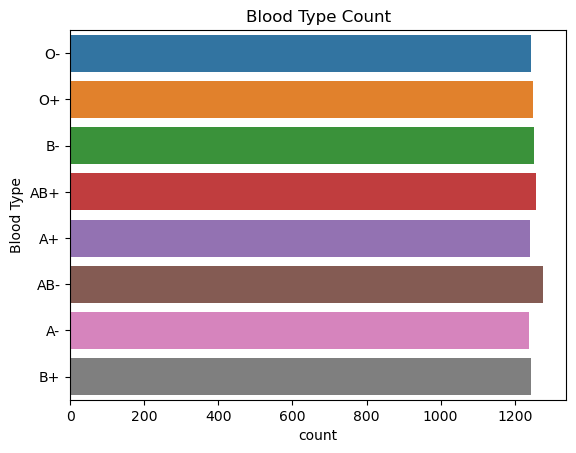

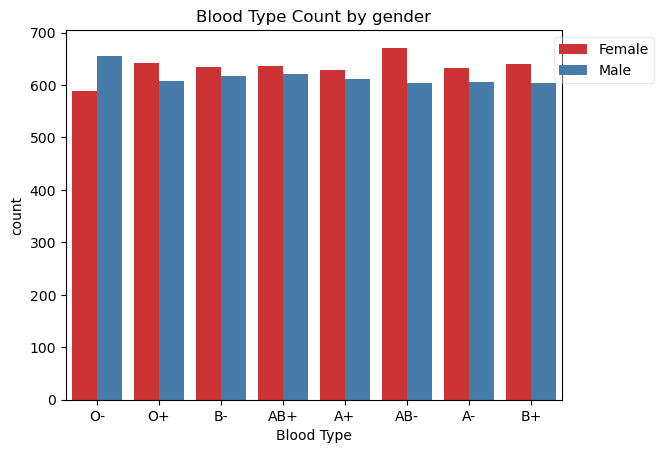

In [8]:
# Gender count
gender_demo=sns.countplot(x='Gender',data=df)
plt.title('Gender ratio of patient')
plt.show()

#Various blood group of patients 
gender_demo=sns.countplot(y='Blood Type',data=df)
plt.title('Blood Type Count')
plt.show()

#Various blood group of patients by gender 
sns.set_palette("Set1")
gender_demo=sns.countplot(x='Blood Type',data=df,hue='Gender')
plt.legend(loc='upper right',bbox_to_anchor=(1.2,1), framealpha=0.4)
plt.title('Blood Type Count by gender')
plt.show()


## Medical analysis by gender

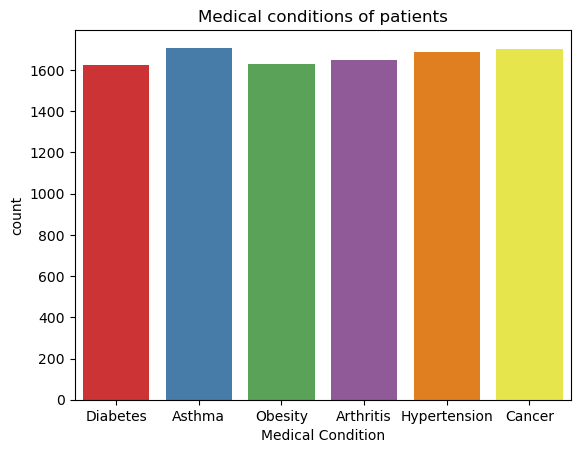

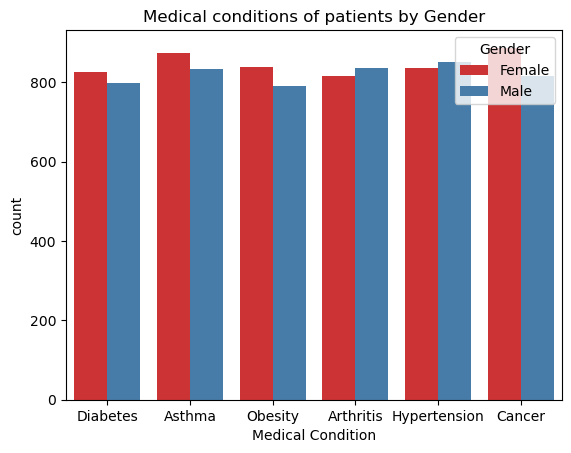

In [9]:
# Medical conditions count
sns.countplot(x='Medical Condition',data=df)
plt.title('Medical conditions of patients')
plt.show()

#Medical condition by Gender
sns.countplot(x='Medical Condition',data=df,hue='Gender')
plt.title('Medical conditions of patients by Gender')
plt.show()

## Age group and medical analysis

In [10]:
age_gender_medical_df=df.groupby(['Age','Gender','Medical Condition']).size().reset_index(name='Count')


In [11]:
age_gender_medical_df

,Age,Gender,Medical Condition,Count
0,18,Female,Arthritis,16
1,18,Female,Asthma,13
2,18,Female,Cancer,14
3,18,Female,Diabetes,12
4,18,Female,Hypertension,22
...,...,...,...,...
811,85,Male,Asthma,5
812,85,Male,Cancer,8
813,85,Male,Diabetes,12
814,85,Male,Hypertension,11


In [12]:


# Create a pivot table for better visualization
pivot_table = age_gender_medical_df.pivot_table(index='Age', columns=['Gender', 'Medical Condition'], values='Count', fill_value=0)

# Create a heatmap


In [13]:
pivot_table

Gender               Female                                              \
Medical Condition Arthritis Asthma Cancer Diabetes Hypertension Obesity   
Age                                                                       
18                       16     13     14       12           22       9   
19                       12     12      6       12            9      11   
20                       13     10     16       22           18      15   
21                        7     14     18       12           15      14   
22                       10      8     11        9           14       7   
..                      ...    ...    ...      ...          ...     ...   
81                       12     17     13       15           12      10   
82                       14      8     12       16            7      14   
83                       14     18      8       10           17      11   
84                        8      9     11       10           11      10   
85                        7     12     13       16            8      16   

Gender                 Male                                              
Medical Condition Arthritis Asthma Cancer Diabetes Hypertension Obesity  
Age                                                                      
18                       12     14     14       13           11      14  
19                        6     14     10       13           16      11  
20                       14     11     12       11           15      12  
21                       11     14     14       13           10      11  
22                       17     14      8        9            9       7  
..                      ...    ...    ...      ...          ...     ...  
81                       11      9     15       13           14      18  
82                        8      9     12       17           17      13  
83                       13      8      6        6            9      11  
84                       12     17     11       12           11      11  
85                       10      5      8       12           11       5  

[68 rows x 12 columns]

In [14]:
## Find the most common and least common diseases in each age group 
most_common_diseases=age_gender_medical_df.loc[age_gender_medical_df.groupby('Medical Condition')['Count'].idxmax()]

In [15]:
print(most_common_diseases)

     Age  Gender Medical Condition  Count
120   28  Female         Arthritis     22
553   64  Female            Asthma     20
494   59  Female            Cancer     25
681   74    Male          Diabetes     23
580   66  Female      Hypertension     24
521   61  Female           Obesity     23


## Most Occured diseases by age

     Age  Gender Medical Condition  Count
4     18  Female      Hypertension     22
22    19    Male      Hypertension     16
27    20  Female          Diabetes     22
38    21  Female            Cancer     18
54    22    Male         Arthritis     17
..   ...     ...               ...    ...
767   81    Male           Obesity     18
777   82    Male          Diabetes     17
781   83  Female            Asthma     18
799   84    Male            Asthma     17
807   85  Female          Diabetes     16

[68 rows x 4 columns]
     Age  Gender Medical Condition  Count
5     18  Female           Obesity      9
14    19  Female            Cancer      6
25    20  Female            Asthma     10
36    21  Female         Arthritis      7
53    22  Female           Obesity      7
..   ...     ...               ...    ...
763   81    Male            Asthma      9
772   82  Female      Hypertension      7
788   83    Male            Cancer      6
792   84  Female         Arthritis      8
811   85   

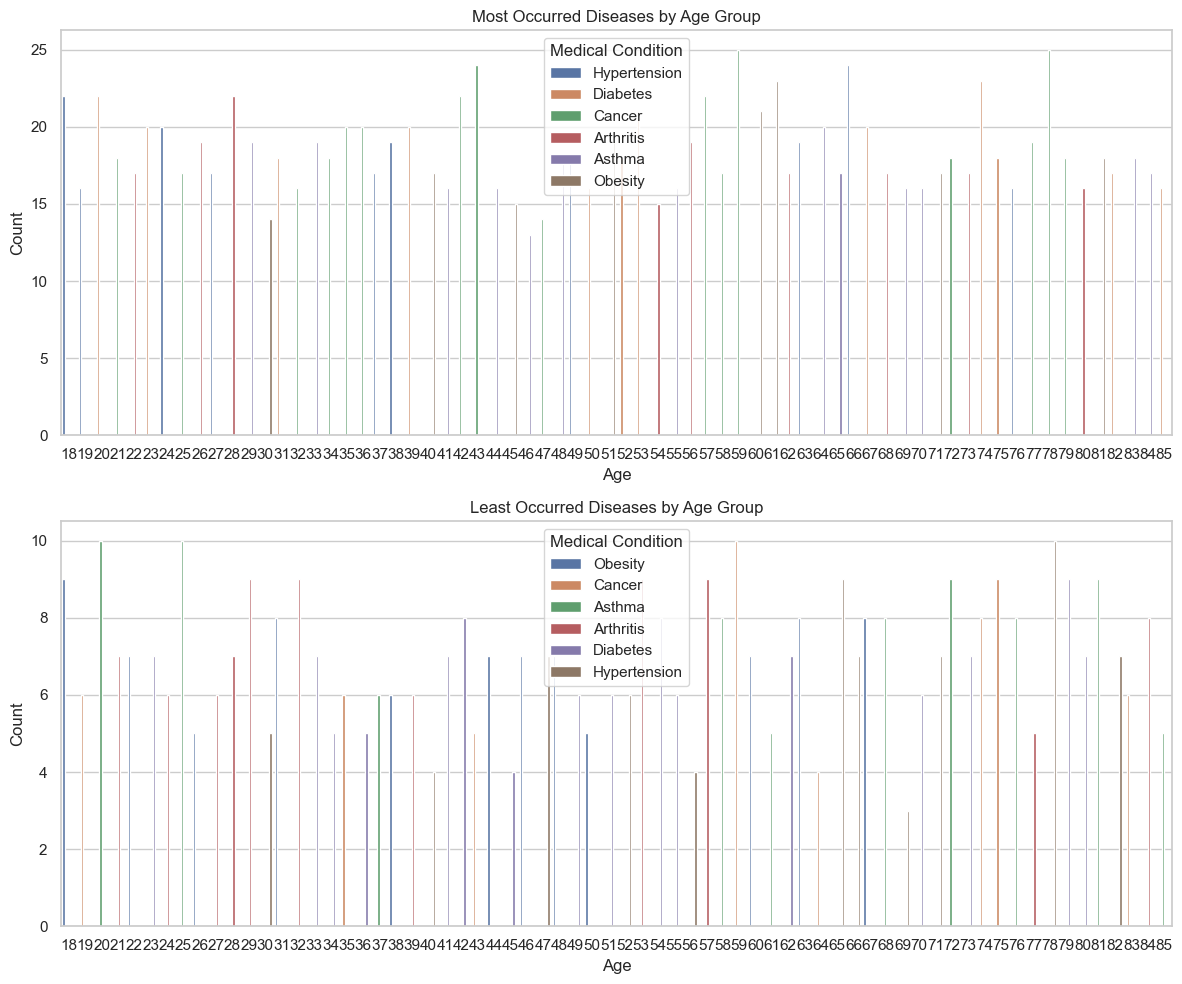

In [16]:
## Find the most common and least common diseases in each age group 
most_occured_diseases_by_age=age_gender_medical_df.loc[age_gender_medical_df.groupby('Age')['Count'].idxmax()]
print(most_occured_diseases_by_age)

# Least disease by age group
least_occured_diseases_by_age=age_gender_medical_df.loc[age_gender_medical_df.groupby('Age')['Count'].idxmin()]
print(least_occured_diseases_by_age)

# Most common diseases 



import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn
sns.set(style="whitegrid")

# Set up subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

# Plot Most Occurred Diseases by Age Group
sns.barplot(x='Age', y='Count', hue='Medical Condition', data=most_occured_diseases_by_age, ax=axes[0])
axes[0].set_title('Most Occurred Diseases by Age Group')
axes[0].set_ylabel('Count')

# Plot Least Occurred Diseases by Age Group
sns.barplot(x='Age', y='Count', hue='Medical Condition', data=least_occured_diseases_by_age, ax=axes[1])
axes[1].set_title('Least Occurred Diseases by Age Group')
axes[1].set_ylabel('Count')

# Adjust layout
plt.tight_layout()
plt.show()



In [17]:
# Find the index of the most common disease for each age and gender
most_common_disease_indices = age_gender_medical_df.groupby(['Age', 'Gender'])['Count'].idxmax()

# Use the indices to extract the corresponding rows
most_common_diseases = age_gender_medical_df.loc[most_common_disease_indices]

# Display the result
print(most_common_diseases)

least_common_diseases_indicies=age_gender_medical_df.groupby(['Age','Gender'])['Count'].idxmin()

least_common_diseases=age_gender_medical_df.loc[least_common_diseases_indicies]

print(least_common_diseases)

most_age_of_patients=df['Age'].mode().values[0]
print(f'The most common age of patient is {most_age_of_patients}')


     Age  Gender Medical Condition  Count
4     18  Female      Hypertension     22
7     18    Male            Asthma     14
12    19  Female         Arthritis     12
22    19    Male      Hypertension     16
27    20  Female          Diabetes     22
..   ...     ...               ...    ...
786   83    Male         Arthritis     13
794   84  Female            Cancer     11
799   84    Male            Asthma     17
807   85  Female          Diabetes     16
813   85    Male          Diabetes     12

[136 rows x 4 columns]
     Age  Gender Medical Condition  Count
5     18  Female           Obesity      9
10    18    Male      Hypertension     11
14    19  Female            Cancer      6
18    19    Male         Arthritis      6
25    20  Female            Asthma     10
..   ...     ...               ...    ...
788   83    Male            Cancer      6
792   84  Female         Arthritis      8
800   84    Male            Cancer     11
804   85  Female         Arthritis      7
811   85  

## Admission and Medical Condition analysis

In [18]:
admission_medical_df=pd.crosstab(df['Medical Condition'],df['Admission Type'])


In [19]:
admission_medical_df

Admission Type,Elective,Emergency,Urgent
Medical Condition,,,
Arthritis,569,529,552
Asthma,570,556,582
Cancer,555,578,570
Diabetes,528,557,538
Hypertension,515,578,595
Obesity,505,569,554


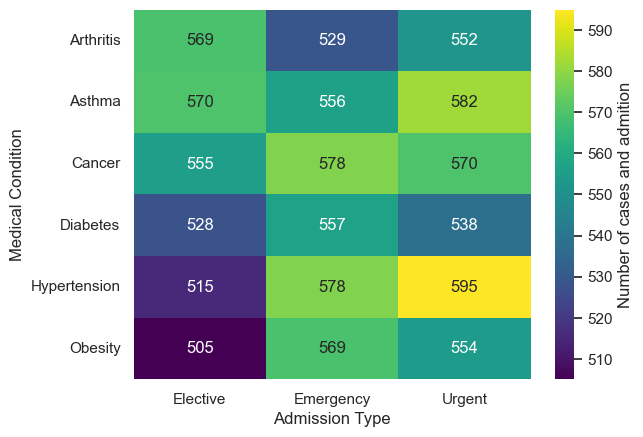

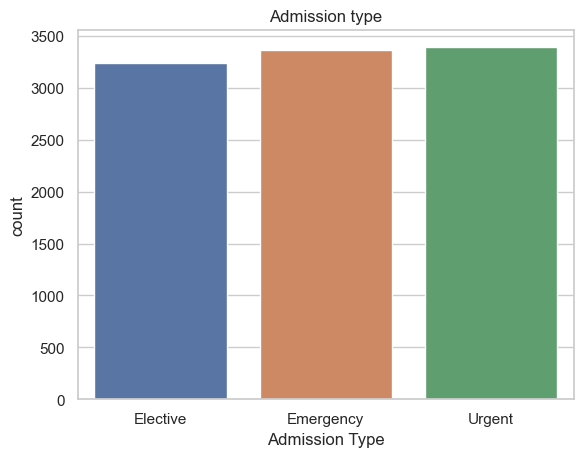

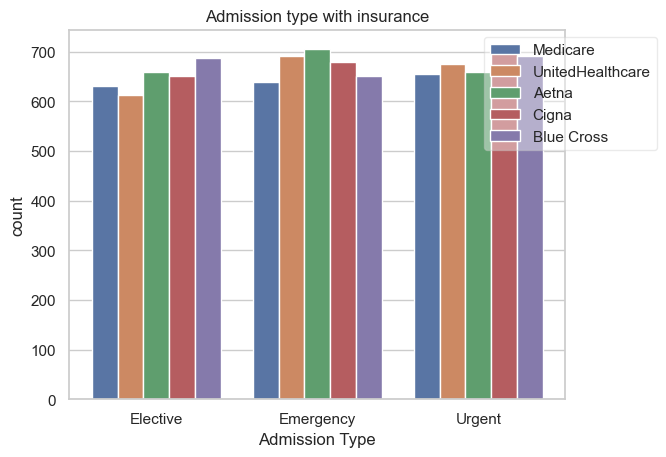

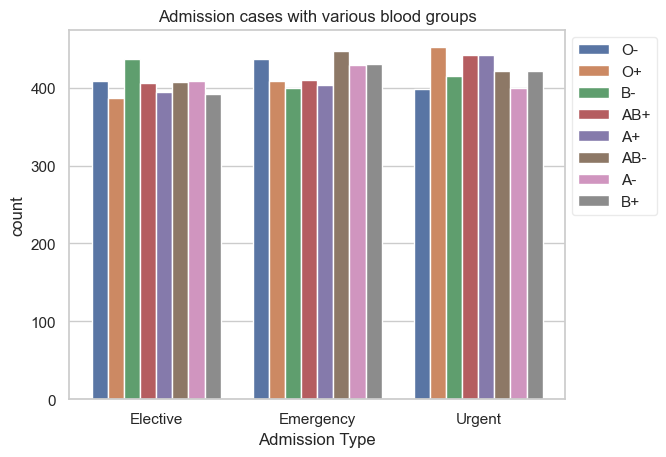

In [20]:
corr=sns.heatmap(admission_medical_df,cmap='viridis',annot=True,fmt='d',cbar_kws={'label':'Number of cases and admition'})
plt.show()

# Admission count

admission_count=sns.countplot(x=df['Admission Type'],data=df)
plt.title('Admission type')
plt.show()

#Admission with respect to Insurence card

admission_insurance=sns.countplot(x=df['Admission Type'],hue='Insurance Provider',data=df)
plt.legend(loc='upper right',bbox_to_anchor=(1.2,1), framealpha=0.4)
plt.title('Admission type with insurance')
plt.plot()
plt.show()

# Admission and Blood type relation

admission_bloodtype=sns.countplot(x=df['Admission Type'],hue='Blood Type',data=df)
plt.legend(loc='upper right',bbox_to_anchor=(1.2,1), framealpha=0.4)
plt.title('Admission cases with various blood groups')
plt.plot()
plt.show()




## Insurance Analysis

___________________________________________________________________________________________

In [21]:
Total_Insurance=df['Insurance Provider'].value_counts()
print(Total_Insurance)

Cigna               2040
Blue Cross          2032
Aetna               2025
UnitedHealthcare    1978
Medicare            1925
Name: Insurance Provider, dtype: int64


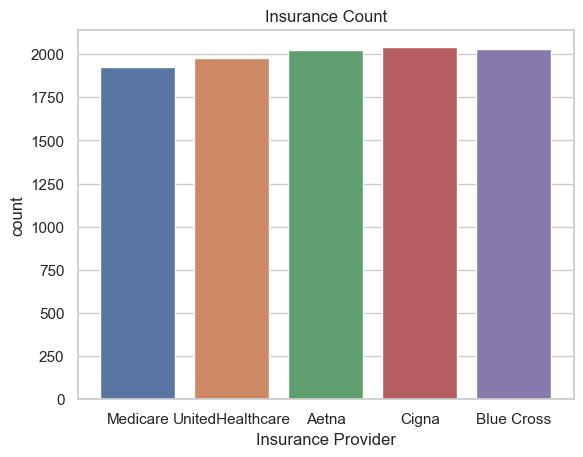

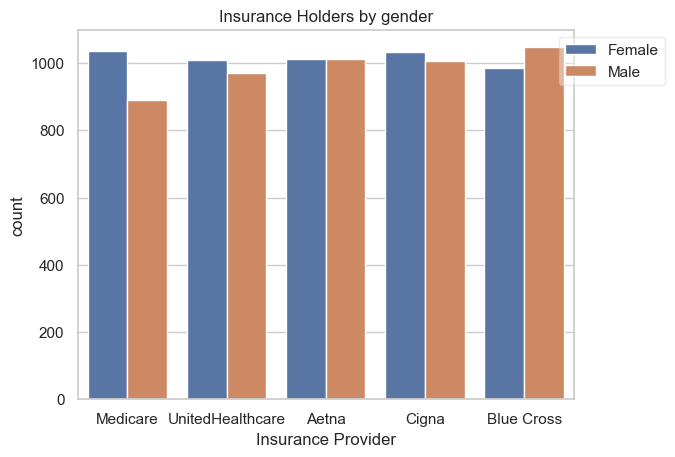

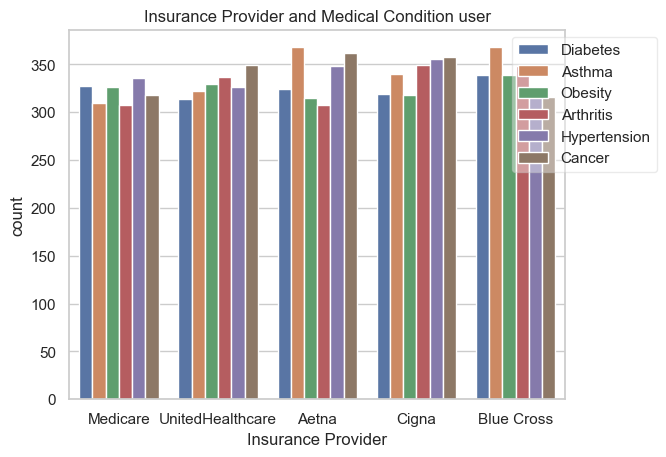

In [22]:
# Insurance providers count 
insurance_providers=sns.countplot(x='Insurance Provider',data=df)
plt.title('Insurance Count')
plt.plot()
plt.show()

# Insurance users by gender
insurance_providers_gender=sns.countplot(x='Insurance Provider',hue='Gender',data=df)
plt.legend(loc='upper right',bbox_to_anchor=(1.2,1), framealpha=0.4)
plt.title('Insurance Holders by gender')
plt.show()

#Insurance provider and medical condition for it's use
insurance_providers_medical=sns.countplot(x='Insurance Provider',hue='Medical Condition',data=df)
plt.legend(loc='upper right',bbox_to_anchor=(1.2,1), framealpha=0.4)
plt.title('Insurance Provider and Medical Condition user')
plt.show()

In [23]:
df

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Tiffany Ramirez,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146,Elective,2022-12-01,Aspirin,Inconclusive
1,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,Lipitor,Normal
2,Chad Byrd,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.896997,292,Emergency,2019-02-08,Lipitor,Normal
3,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480,Urgent,2020-05-03,Penicillin,Abnormal
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477,Urgent,2021-08-02,Paracetamol,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,James Hood,83,Male,A+,Obesity,2022-07-29,Samuel Moody,"Wood, Martin and Simmons",UnitedHealthcare,39606.840083,110,Elective,2022-08-02,Ibuprofen,Abnormal
9996,Stephanie Evans,47,Female,AB+,Arthritis,2022-01-06,Christopher Yates,Nash-Krueger,Blue Cross,5995.717488,244,Emergency,2022-01-29,Ibuprofen,Normal
9997,Christopher Martinez,54,Male,B-,Arthritis,2022-07-01,Robert Nicholson,Larson and Sons,Blue Cross,49559.202905,312,Elective,2022-07-15,Ibuprofen,Normal
9998,Amanda Duke,84,Male,A+,Arthritis,2020-02-06,Jamie Lewis,Wilson-Lyons,UnitedHealthcare,25236.344761,420,Urgent,2020-02-26,Penicillin,Normal


## Financial analysis

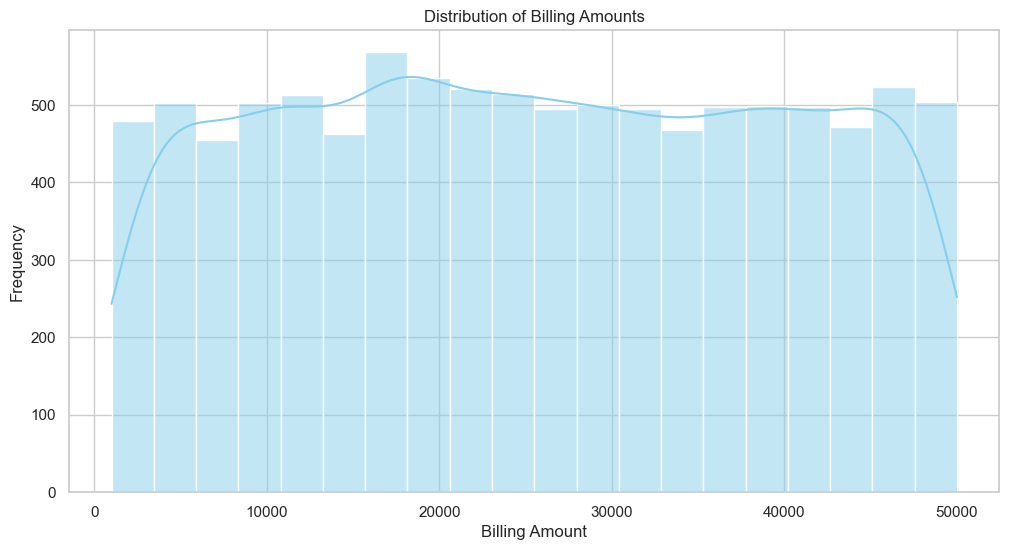

In [24]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Billing Amount'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Billing Amounts')
plt.xlabel('Billing Amount')
plt.ylabel('Frequency')
plt.show()


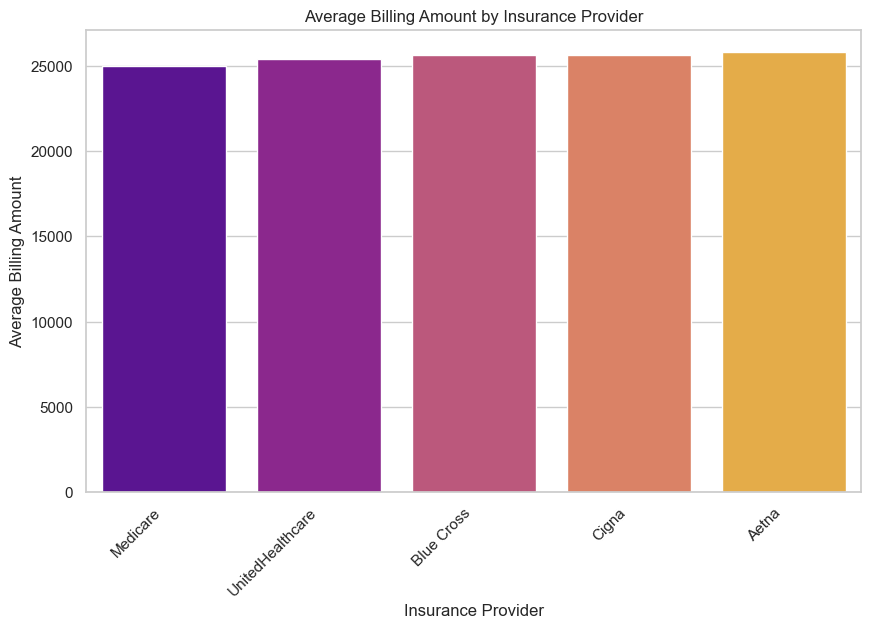

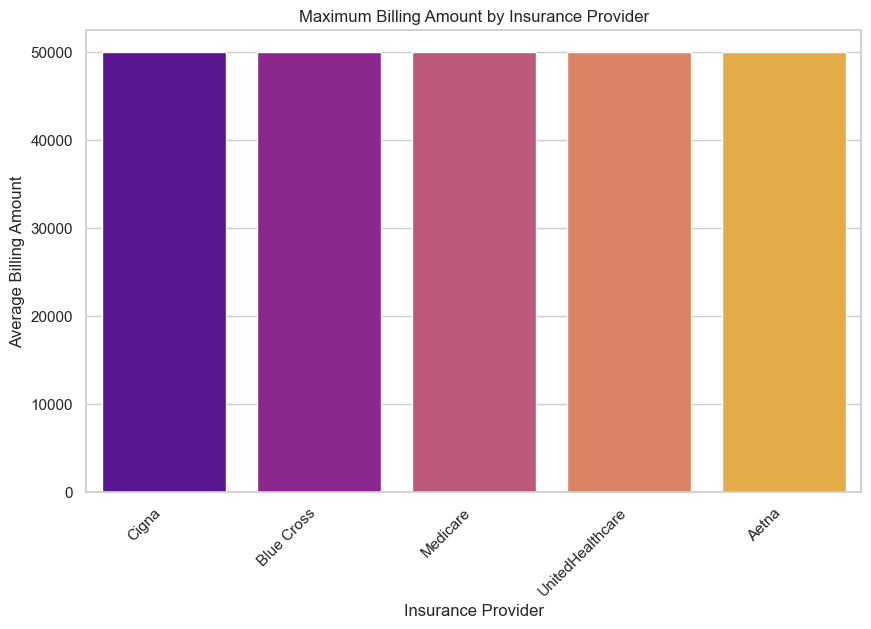

In [29]:
average_billing_by_provider = df.groupby('Insurance Provider')['Billing Amount'].mean().sort_values()
plt.figure(figsize=(10, 6))
sns.barplot(x=average_billing_by_provider.index, y=average_billing_by_provider.values, palette='plasma')
plt.title('Average Billing Amount by Insurance Provider')
plt.xlabel('Insurance Provider')
plt.ylabel('Average Billing Amount')
plt.xticks(rotation=45, ha='right')
plt.show()

## maximum billing analysis
max_billing_by_provider = df.groupby('Insurance Provider')['Billing Amount'].max().sort_values()
plt.figure(figsize=(10, 6))
sns.barplot(x=max_billing_by_provider.index, y=max_billing_by_provider.values, palette='plasma')
plt.title('Maximum Billing Amount by Insurance Provider')
plt.xlabel('Insurance Provider')
plt.ylabel('Average Billing Amount')
plt.xticks(rotation=45, ha='right')
plt.show()

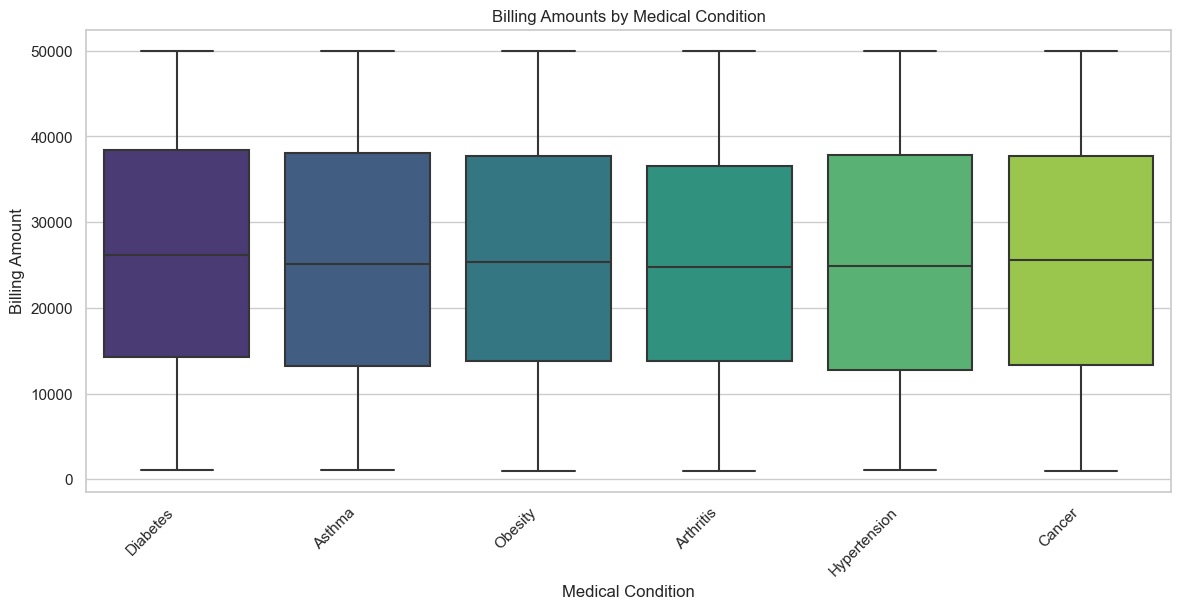

In [30]:
plt.figure(figsize=(14, 6))
sns.boxplot(x='Medical Condition', y='Billing Amount', data=df, palette='viridis')
plt.title('Billing Amounts by Medical Condition')
plt.xlabel('Medical Condition')
plt.ylabel('Billing Amount')
plt.xticks(rotation=45, ha='right')
plt.show()


In [36]:
billing_summary = df['Billing Amount'].describe()
print(billing_summary)


count    10000.000000
mean     25516.806778
std      14067.292709
min       1000.180837
25%      13506.523967
50%      25258.112566
75%      37733.913727
max      49995.902283
Name: Billing Amount, dtype: float64


## Time series analysis 

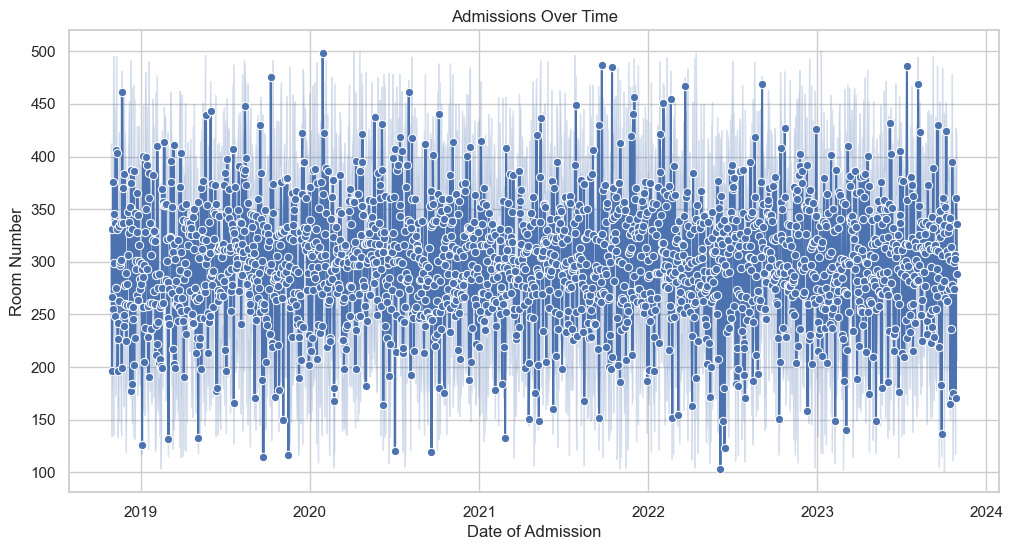

In [26]:
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'])
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date of Admission', y='Room Number', data=df, marker='o')
plt.title('Admissions Over Time')
plt.xlabel('Date of Admission')
plt.ylabel('Room Number')
plt.show()
